In [1]:
# load CNN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image

# confusion matrix
from sklearn.metrics import confusion_matrix


In [2]:
model = load_model('CNN_best2.h5')

/opt/anaconda3/envs/TFbase/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-26 13:26:32.025193: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-06-26 13:26:32.025220: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-26 13:26:32.025224: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-26 13:26:32.025868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-26 13:26:32.025886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.c

In [3]:
train_ds = keras.utils.image_dataset_from_directory(
    # directory='/Volumes/PRO-G40/Scriptie/data/training_data',
    directory='/Volumes/PRO-G40/Scriptie/data256+/training_data',
    labels='inferred',
    label_mode='binary',
    batch_size=128,
    image_size=(256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    # directory='/Volumes/PRO-G40/Scriptie/data/testing_data',
    directory='/Volumes/PRO-G40/Scriptie/data256+/testing_data',
    labels='inferred',
    label_mode='binary',
    batch_size=128,
    image_size=(256, 256)
)

test_ds = keras.utils.image_dataset_from_directory(
    directory='/Volumes/PRO-G40/Scriptie/data256++/testing_data',
    labels='inferred',
    label_mode='binary',
    batch_size=128,
    image_size=(256, 256)
)

Found 32000 files belonging to 2 classes.
Found 8000 files belonging to 2 classes.
Found 10000 files belonging to 2 classes.


2024-06-26 13:26:34.183366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


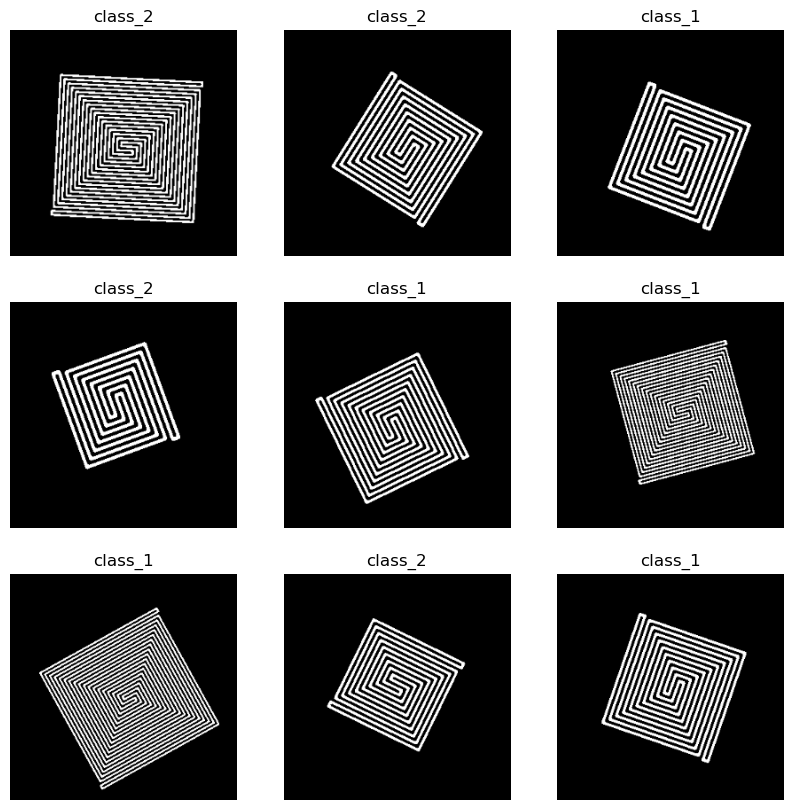

In [4]:
# print image of the dataset
class_names = test_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.show()


(-0.5, 255.5, 255.5, -0.5)

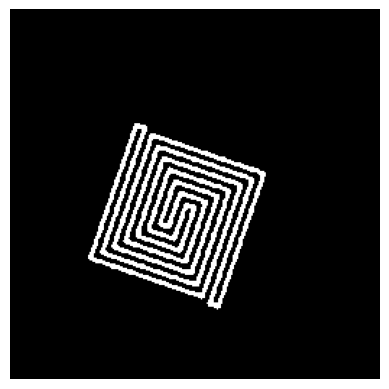

In [5]:

img_path = '/Volumes/PRO-G40/Scriptie/data256++/testing_data/class_2/random_spiral_12.png'
img = cv2.imread(img_path)
img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)[1]
img = cv2.resize(img, (256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

plt.imshow(img)
plt.axis('off')


In [6]:
# predict image
predictions = model.predict(img_array)
print(predictions)
# print(predictions < 0.1)

if predictions < 0.1:
    print('class 1')
else:
    print('class 2')    

2024-06-26 13:26:34.677594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
[[1.]]
class 2


In [7]:
# Recompile the model with correct metrics if necessary
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(test_ds)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.9976 - loss: 0.0768
Test Loss: 0.07882103323936462
Test Accuracy: 0.9972000122070312


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


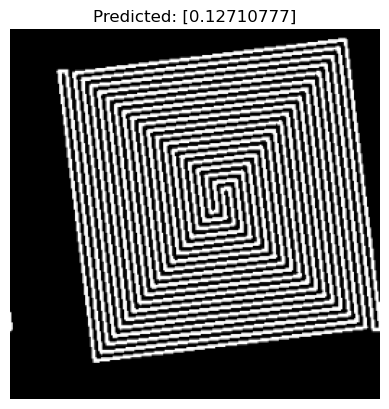

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


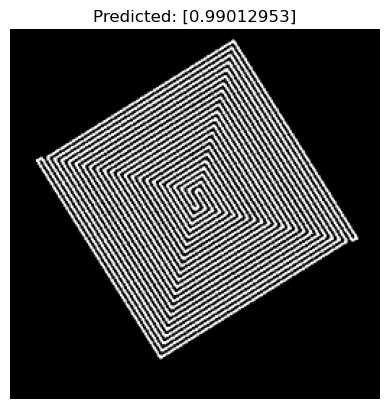

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


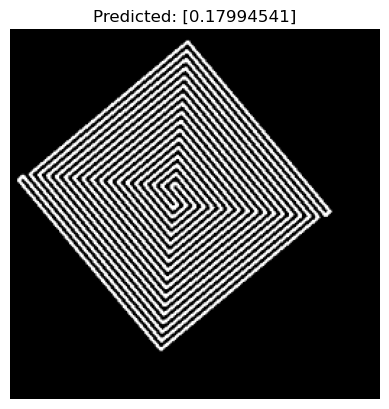

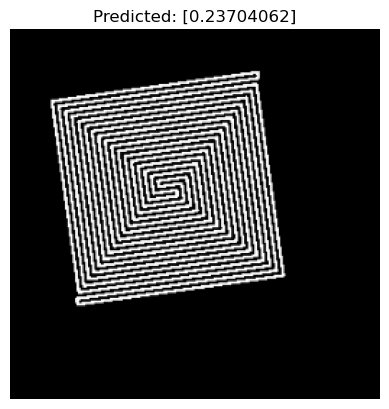

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


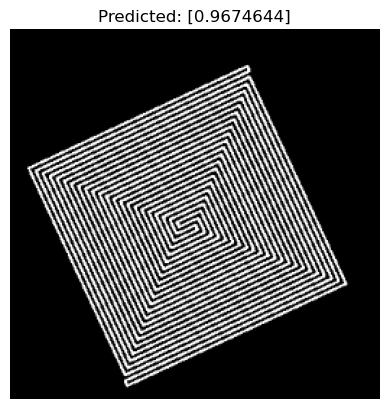

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


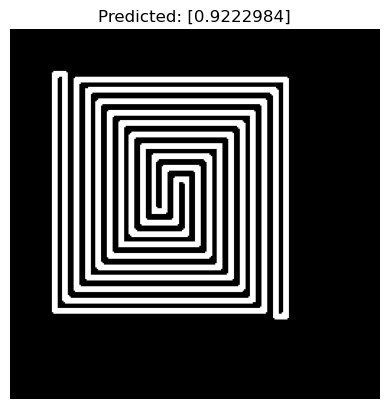

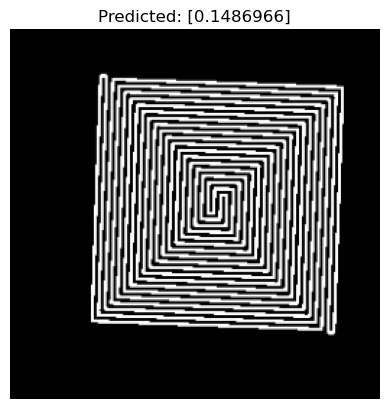

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


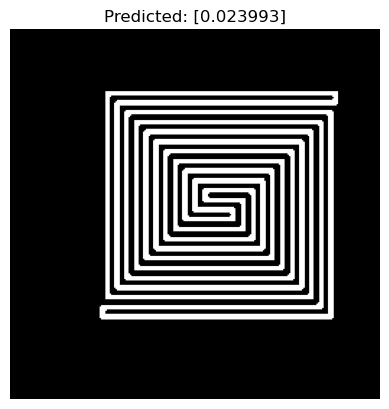

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


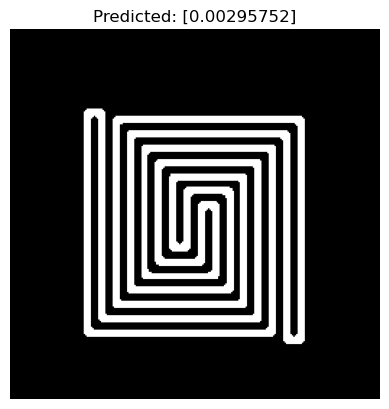

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


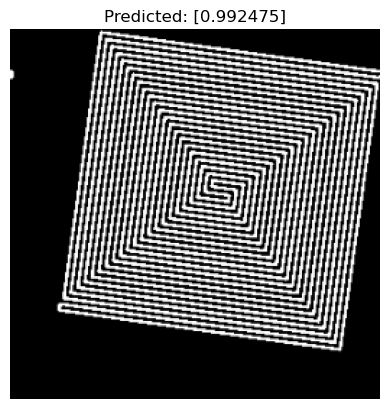

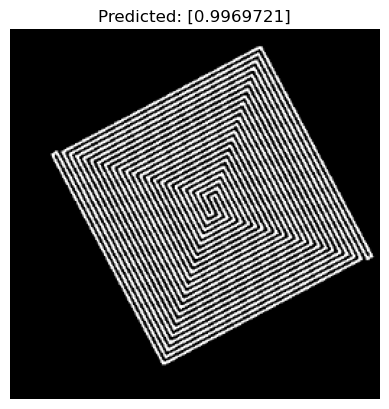

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


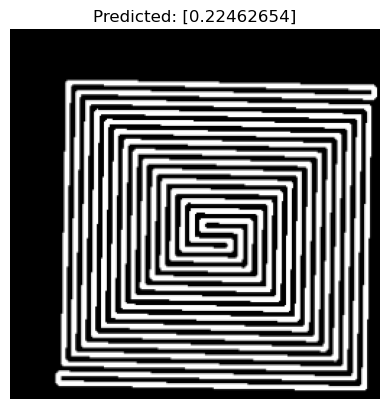

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


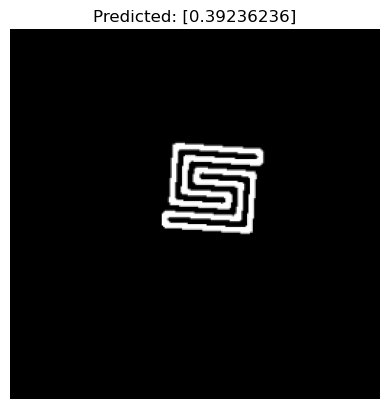

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


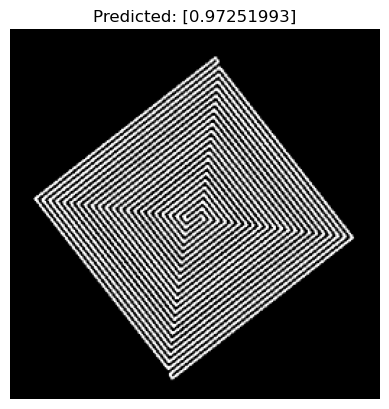

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


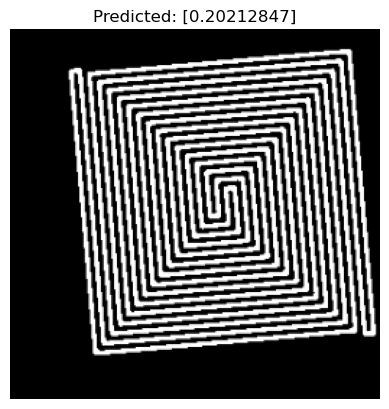

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


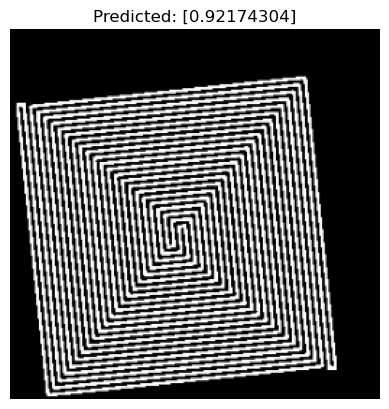

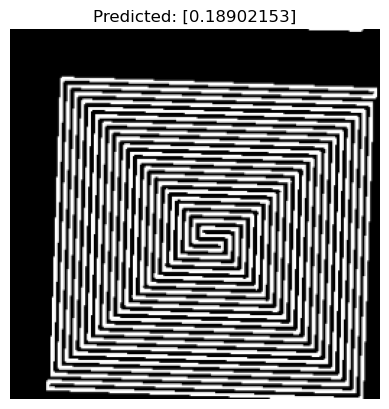

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


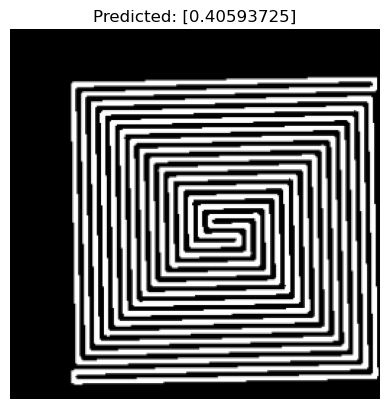

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


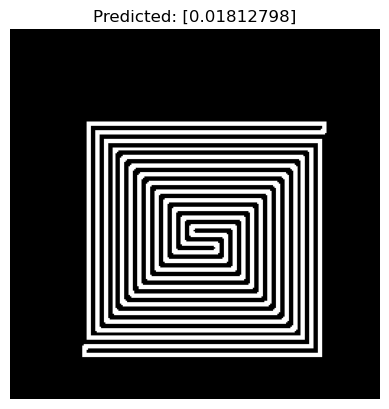

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


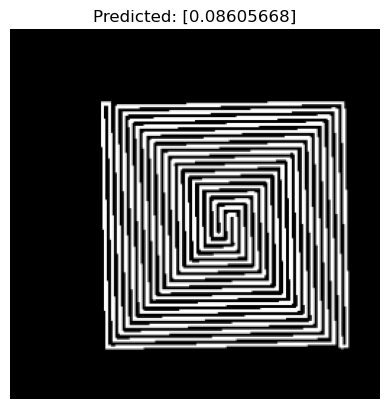

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


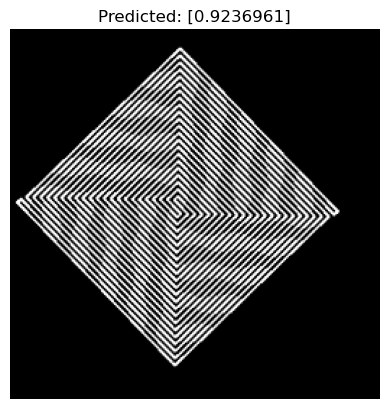

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


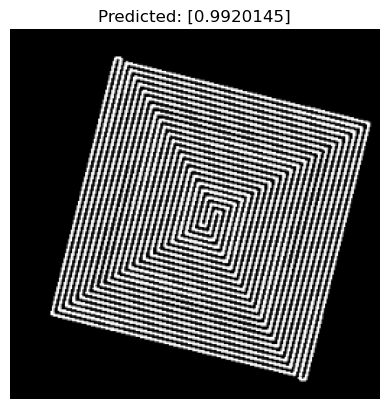

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


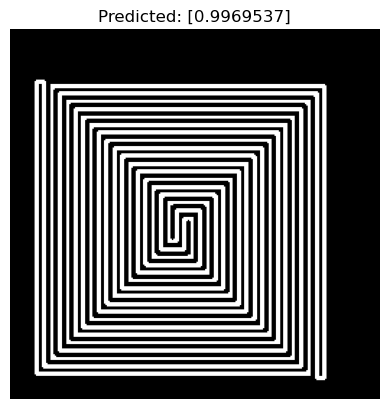

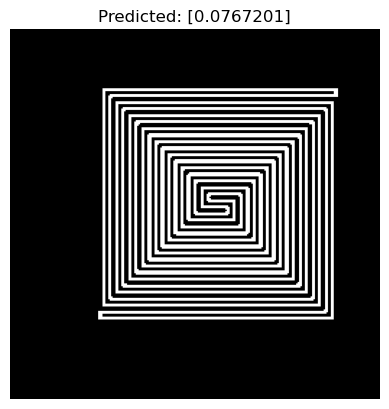

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


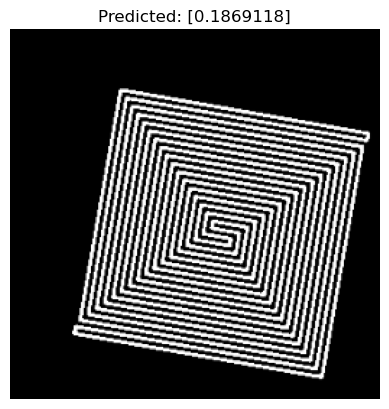

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


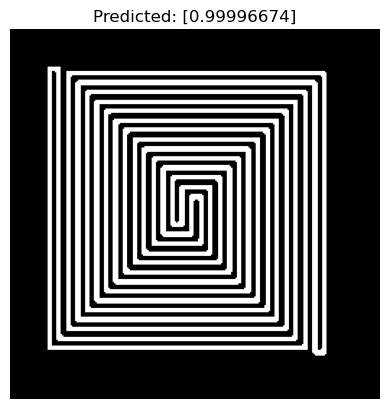

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


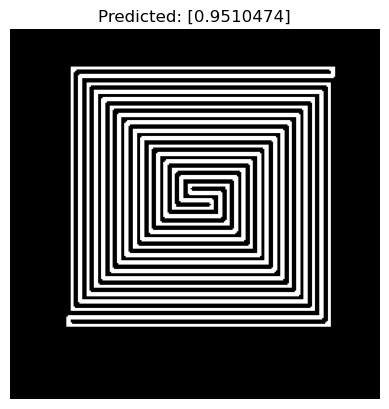

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


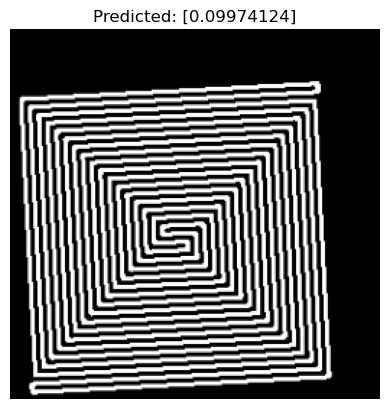

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
F1 Score: 0.9971757111155941


2024-06-26 13:27:22.622504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [8]:
from sklearn.metrics import f1_score

y_pred = []
y_true = []
wrong_images = []
correct_labels = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(images)
    y_pred.extend(predictions)

    # plot prediction if wrong
    for i in range(len(predictions)):
        if predictions[i] < 0.5 and labels[i] == 1 or predictions[i] > 0.5 and labels[i] == 0:
            wrong_images.append(images[i])
            correct_labels.append(labels[i])

            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f'Predicted: {predictions[i]}')
            plt.axis("off")
            plt.show()

# Convert predictions to binary labels (assuming binary classification)
y_pred = np.array(y_pred).flatten()
y_pred = np.where(y_pred > 0.5, 1, 0)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

print(f'F1 Score: {f1}')

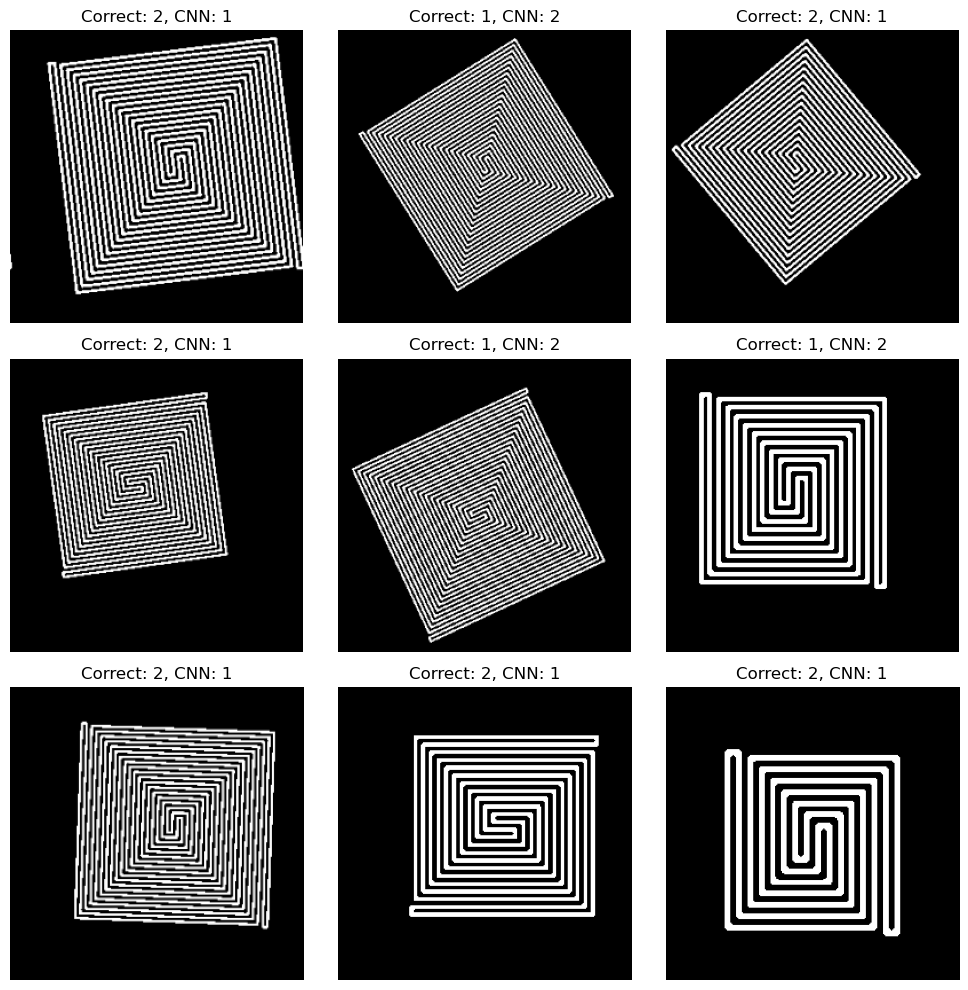

In [9]:
# plot those images that are predicted wrong
plt.figure(figsize=(10, 10))

# # title
# plt.suptitle('Wrong Predictions')
# plt.subplots_adjust(top=0.94)


for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(wrong_images[i].numpy().astype("uint8"), cmap='gray')
    plt.title(f'Correct: {int(correct_labels[i]+1)}, CNN: {int(2-correct_labels[i])}')
    plt.axis("off")

plt.tight_layout()
plt.show()

In [10]:
y_true_int = [int(i) for i in y_true]

/var/folders/n8/hmr8vlz93m53jxks_f0gz6qh0000gn/T/ipykernel_8166/3712492713.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_true_int = [int(i) for i in y_true]


tf.Tensor(
[[5029   12]
 [  16 4943]], shape=(2, 2), dtype=int32)
              precision    recall  f1-score   support

     class_1     0.9968    0.9976    0.9972      5041
     class_2     0.9976    0.9968    0.9972      4959

    accuracy                         0.9972     10000
   macro avg     0.9972    0.9972    0.9972     10000
weighted avg     0.9972    0.9972    0.9972     10000



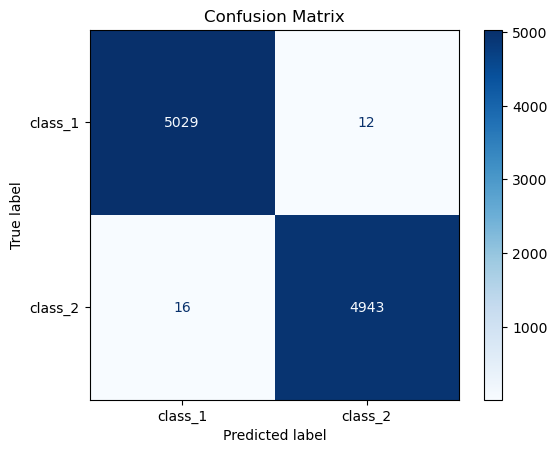

In [11]:
# print confusion matrix
cm = tf.math.confusion_matrix(y_true_int, y_pred)
print(cm)

# print classification report
from sklearn.metrics import classification_report
from matplotlib.colors import LinearSegmentedColormap

print(classification_report(y_true_int, y_pred, target_names=class_names, digits=4))

#sklearn displa confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true_int, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix with custom colormap
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Blues')

# Customize further as needed
plt.title('Confusion Matrix')
plt.show()


In [12]:
wrong_images = [tf.image.rgb_to_grayscale(image) for image in wrong_images]

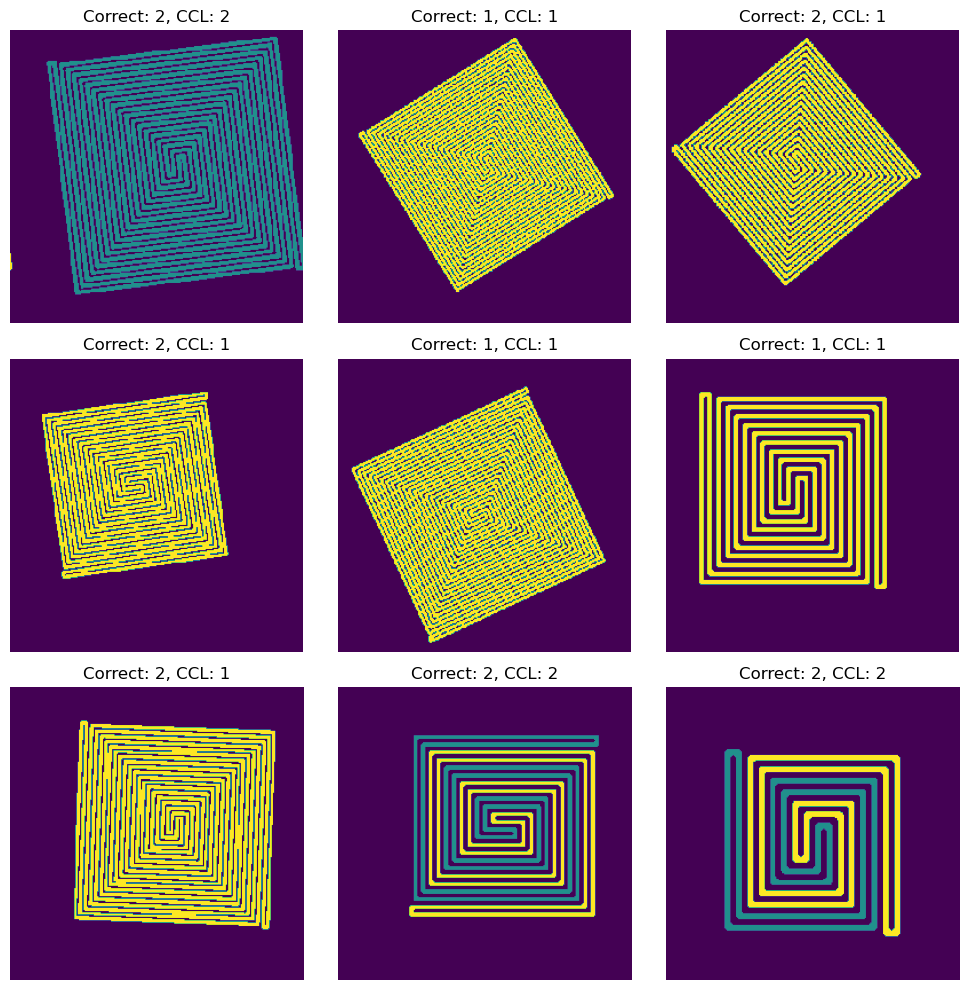

In [13]:
# apply CCL to each wrong image
import cv2
import numpy as np

def apply_ccl(image):
    image = np.where(image > 0.5, 1, 0)
    image = np.uint8(image)
    _, labels = cv2.connectedComponents(image)
    return labels

# for i in range(len(wrong_images)):
#     labels = apply_ccl(wrong_images[i].numpy())

#     # plot the image in a 10x10 grid
#     plt.figure(figsize=(10, 10))
#     plt.suptitle('Connected Components')
#     plt.subplots_adjust(top=0.94)
#     plt.subplot(3, 3, 1)
#     plt.imshow(wrong_images[i].numpy().astype("uint8"), cmap='gray')
#     plt.title(f'Correct: {int(correct_labels[i]+1)}, Predicted: {int(2-correct_labels[i])}')
#     plt.axis("off")

plt.figure(figsize=(10, 10))

for i in range(9):
    labels = apply_ccl(wrong_images[i].numpy())
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(labels)
    plt.title(f'Correct: {int(correct_labels[i]+1)}, CCL: {np.max(labels)}')
    # make title smaller
    # ax.title.set_size(8)
    plt.axis("off")

plt.tight_layout()
plt.show()

    
    # plot the connected components using
    # the default colormap of
    # plt.imshow(labels)
    # plt.show()
    # print(f'Number of objects: {np.max(labels)}')
    # print(f'Correct: {correct_labels[i]+1}', f'Predicted: {2-correct_labels[i]}')

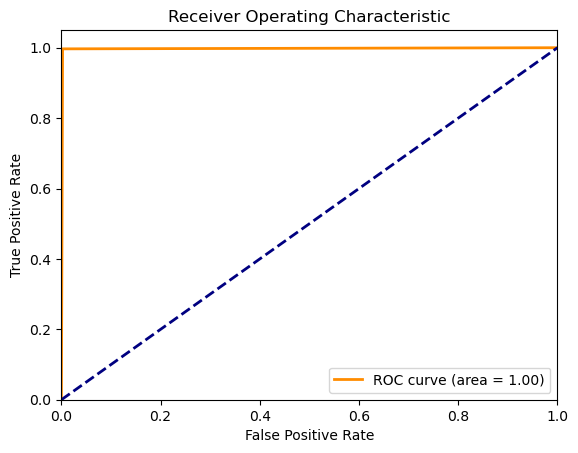

In [14]:
# oac roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [15]:
# # print kernel weights of the first layer

# # Get the weights of the first layer
# layer = model.layers[0]
# weights = layer.get_weights()

# # The weights are a list of two elements. The first element is the kernel weights and the second element is the bias
# kernel_weights = weights[0]

# # Normalize the kernel weights to the range [0, 1] for better visualization
# kernel_weights = kernel_weights - np.min(kernel_weights)
# kernel_weights = kernel_weights / np.max(kernel_weights)

# # Plot the kernel weights
# plt.figure(figsize=(10, 10))
# for i in range(16):
#     ax = plt.subplot(4, 4, i + 1)
#     plt.imshow(kernel_weights[:, :, :, i])
#     plt.axis("off")

# plt.show()


In [16]:
# def visualize_kernels(model, layer_name, num_kernels=32):
#     # Get the layer weights
#     layer = model.get_layer(name=layer_name)
#     W, b = layer.get_weights()
    
#     # Normalize the kernels
#     W_min = W.min()
#     W_max = W.max()
#     W = (W - W_min) / (W_max - W_min)
    
#     # Plot the kernels
#     num_filters = W.shape[-1]
#     num_channels = W.shape[-2]
    
#     fig, axes = plt.subplots(8, 8, figsize=(10, 10))
#     for i in range(num_kernels):
#         ax = axes[i // 8, i % 8]
#         # Visualize only the first RGB channel (assuming it's the first channel)
#         ax.imshow(W[:, :, 0, i], cmap='gray')
#         ax.axis('off')
    
#     plt.show()

# # Example usage with a TensorFlow model
# # Assuming you have a model named 'model' and you want to visualize the first convolutional layer named 'conv2d'
# visualize_kernels(model, 'conv2d_2', num_kernels=32)

In [17]:
# def imtable(X, titles, max_images=100):
#     """Display a table of images with titles.
#     X is a 4D tensor of images, e.g. as that produced by the forward method of a torch.nn module.
#     titles is a list of len(X) titles to display above each image.
#     """
#     if len(X) > max_images:
#         X = X[:max_images]
#         titles = titles[:max_images]
#     fig, ax = plt.subplots(1, len(X), figsize=(20, 20))
#     for i in range(len(X)):
#         ax[i].imshow(X[i].squeeze().detach().cpu().numpy(), cmap='gray')
#         ax[i].axis('off')
#         ax[i].set_title(titles[i])
#     plt.show()

# print(model.summary())

# # Here the code to visualize the kernels
# ### START SOLUTION
# W, b = list(model.conv2d.parameters())
# W = W.detach().cpu()  # detach from the backprop graph and move data to the cpu (if it was on the gpu)
# imtable(W, len(W)*[""], 10)
# ### END SOLUTION

In [18]:
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Accuracy and Loss over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy/Loss')
# plt.legend(loc='best')
# plt.grid(True)
# plt.savefig('CNN_best.png')
# plt.show()


In [19]:
# wrong_images = []

# # print the images that are predicted wrong
# for images, labels in test_ds:
#     for i in range(1000):
#         img = images[i].numpy().astype("uint8")
#         img1 = cv2.resize(img, (256, 256))
#         img_array = image.img_to_array(img1)
#         img_array = np.expand_dims(img_array, axis=0)
#         predictions = model.predict(img_array)
#         if predictions < 0.1 and labels[i] == 1:
#             wrong_images.append(img)
#         elif predictions > 0.9 and labels[i] == 0:
#             wrong_images.append(img)


In [20]:
# # show the wrong images
# plt.figure(figsize=(10, 10))
# for i in range(len(wrong_images)):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(wrong_images[i])
#     plt.title('Wrong prediction')
#     plt.axis("off")
# plt.show()

In [21]:
image = "/Volumes/PRO-G40/Scriptie/code/CNN/spiral_book.jpg"

# load img as grayscale
img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

# plt.imshow(img, cmap='gray')
# plt.axis('off')

canvas = cv2.resize(img, (256, 256), interpolation=cv2.INTER_LINEAR)
canvas = cv2.threshold(canvas, 110, 255, cv2.THRESH_BINARY)[1]

# # plot
# plt.imshow(canvas, cmap='gray')
# print(canvas.shape)

# canvas = cv2.resize(canvas, (256, 256))
print(canvas.shape)
canvas2 = np.expand_dims(canvas, axis=0)
canvas3 = np.expand_dims(canvas2, axis=3)

# make it not grayscale
canvas4 = np.repeat(canvas3, 3, axis=3)

# predict image
predictions = model.predict(canvas4)

print(predictions)

(256, 256)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
[[1.]]
